<a href="https://colab.research.google.com/github/TwoGunTitan/Fake-Review-detection/blob/main/Amazon_Fake_Reviews_Traditional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fake Reviews Detection in Amazon Dataset


This code snippet shows a variety of traditional machine learning models were employed for text classification tasks, showcasing the versatility of these models in handling textual data.
  
- **Implemented Models**:
  - The implemented models include Naive Bayes, Support Vector Machines (SVM), Decision Trees, Random Forest, and others, providing a diverse range of approaches to text classification.
  
- **Dataset and Features**:
  - Each model was trained and evaluated on a dataset containing features such as category, rating, and text content, allowing for a thorough comparison of their performance.
  
- **Performance Evaluation**:
  - Performance metrics including accuracy, precision, recall, and F1 score were calculated for each model, enabling a comprehensive assessment of their effectiveness in classifying text data.
  
- **Insights and Comparison**:
  - By employing multiple models and comparing their performance, this approach offers insights into the strengths and weaknesses of different machine learning algorithms for text classification tasks.

- **Metrics Visualizations**:
  - The code iterates through models, training each on the data and evaluating their performance. It plots ROC curves for models supporting predict_proba, and computes precision-recall curves if applicable. Additionally, it generates calibration curves for models with predict_proba, and visualizes confusion matrices for all models to assess classification performance.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.7 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, FunctionTransformer, StandardScaler
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/fake reviews dataset.csv'
df = pd.read_csv(file_path)

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Define the features and target variables
X_train = train_data[['category', 'rating', 'text_']]
y_train = train_data['label']
X_test = test_data[['category', 'rating', 'text_']]
y_test = test_data['label']

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/fake reviews dataset.csv'
df = pd.read_csv(file_path)

# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Define the features and target
X_train = train_data[['category', 'rating', 'text_']]
y_train = train_data['label']
X_test = test_data[['category', 'rating', 'text_']]
y_test = test_data['label']

# Define models and corresponding parameters
models = {
    "Multinomial Naive Bayes": {
        "model": make_pipeline(CountVectorizer(), MultinomialNB()),
    },
    "Bernoulli Naive Bayes": {
        "model": make_pipeline(CountVectorizer(), BernoulliNB()),
    },
    "LinearSVC": {
        "model": make_pipeline(CountVectorizer(), StandardScaler(with_mean=False), LinearSVC()),
    },
    "Random Forest": {
        "model": make_pipeline(CountVectorizer(), RandomForestClassifier()),
    },
    "Extra Trees": {
        "model": make_pipeline(CountVectorizer(), ExtraTreesClassifier()),
    },
    "AdaBoost": {
        "model": make_pipeline(CountVectorizer(), AdaBoostClassifier()),
    },
    "Bagging": {
        "model": make_pipeline(CountVectorizer(), BaggingClassifier()),
    },
    "Decision Tree": {
        "model": make_pipeline(CountVectorizer(), DecisionTreeClassifier()),
    },
    "Extra Tree": {
        "model": make_pipeline(CountVectorizer(), ExtraTreeClassifier()),
    },
    "K Nearest Neighbors": {
        "model": make_pipeline(CountVectorizer(), KNeighborsClassifier()),
    },
    "Logistic Regression": {
        "model": make_pipeline(CountVectorizer(), LogisticRegression(max_iter=1000, solver='liblinear')),
    },
    "Ridge Classifier": {
        "model": make_pipeline(CountVectorizer(), RidgeClassifier()),
    },
    "SGD Classifier": {
        "model": make_pipeline(CountVectorizer(), SGDClassifier()),
    },
    "CatBoost": {
        "model": make_pipeline(CountVectorizer(), CatBoostClassifier(silent=True)),
    },
    "LightGBM": {
        "model": make_pipeline(CountVectorizer(),
                               FunctionTransformer(lambda x: x.astype(np.float32), validate=False),
                               LGBMClassifier()),
    }
    # "SVM": {
    #     "model": make_pipeline(CountVectorizer(), SVC(probability=True)),
    # }
}

In [ ]:
# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])

# Loop over models, train, predict and evaluate
for model_name, model_info in models.items():
    try:
        model = model_info["model"]
        model.fit(X_train['text_'], y_train)
        predictions = model.predict(X_test['text_'])
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='weighted')
        recall = recall_score(y_test, predictions, average='weighted')
        f1 = f1_score(y_test, predictions, average='weighted')

        # Compute ROC curve and ROC area if the model supports it
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test['text_'])[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_score)
            roc_auc = auc(fpr, tpr)
        else:
            fpr, tpr, roc_auc = None, None, None

        results_df = pd.concat([results_df, pd.DataFrame({'Model': [model_name],
                                                          'Accuracy': [accuracy],
                                                          'Precision': [precision],
                                                          'Recall': [recall],
                                                          'F1 Score': [f1],
                                                          'ROC AUC': [roc_auc]})], ignore_index=True)

    except Exception as e:
        print(f"Error occurred for model {model_name}: {e}")

# Output the results
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16145, number of negative: 16200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.077181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17485
[LightGBM] [Info] Number of data points in the train set: 32345, number of used features: 4282
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499150 -> initscore=-0.003401
[LightGBM] [Info] Start training from score -0.003401
                      Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0   Multinomial Naive Bayes  0.858786   0.862643  0.858786  0.858467  0.944864
1     Bernoulli Naive Bayes  0.726969   0.780629  0.726969  0.713859  0.887355
2                 LinearSVC  0.798937   0.803781  0.798937  0.798245      None
3             Random Forest  0.875850   0.879133  0.875850  0.875626  0.955719
4               Extra Trees  0.893533   0.89

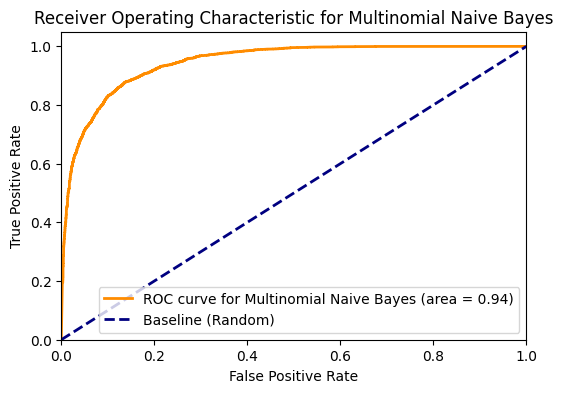

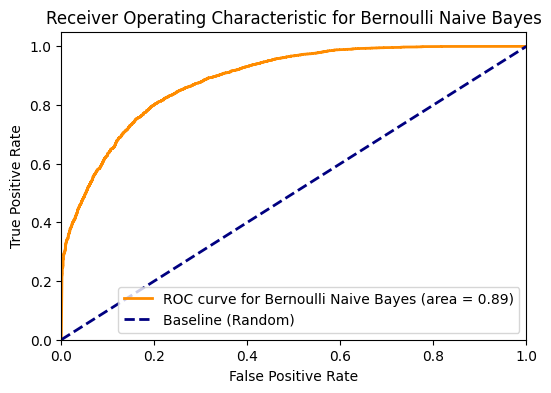

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


ROC curve cannot be plotted for LinearSVC: Model does not support predict_proba.


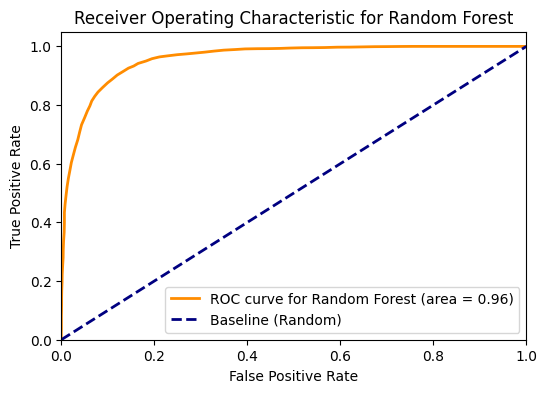

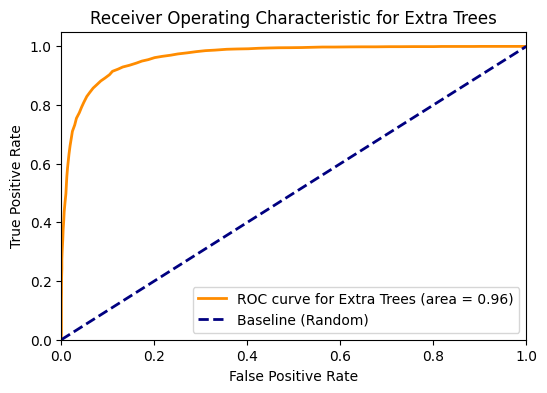

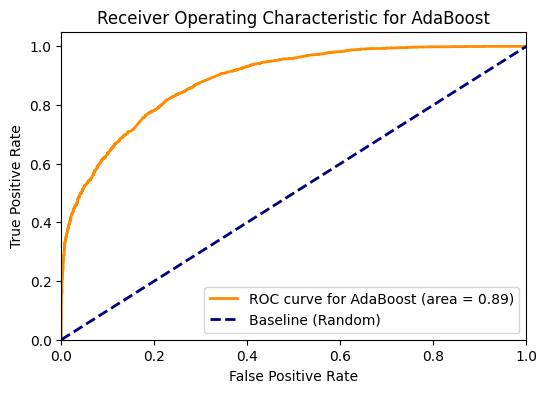

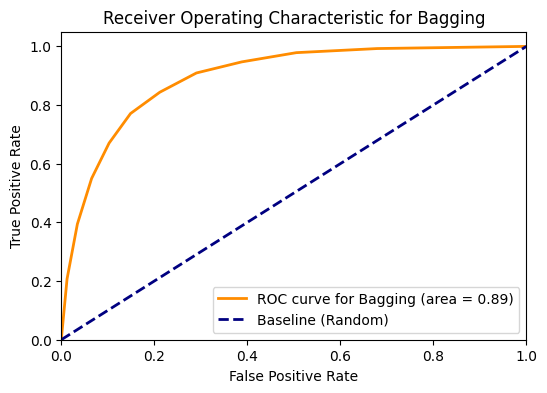

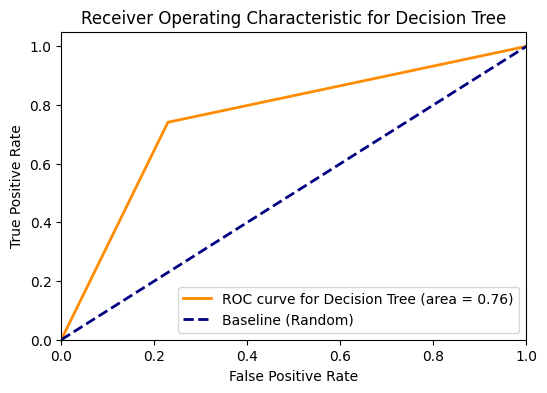

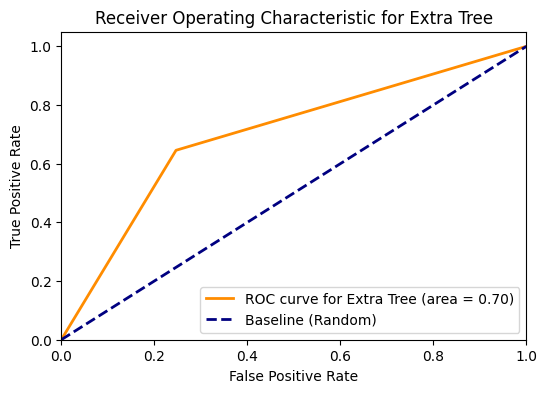

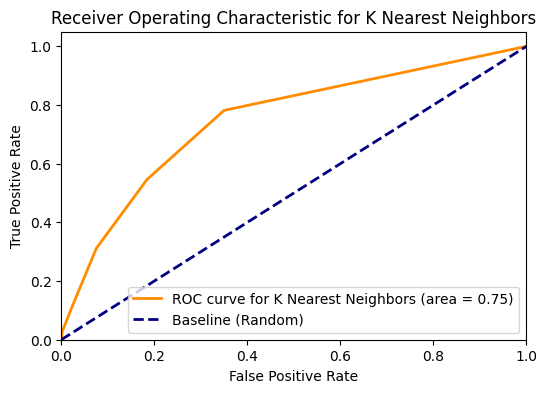

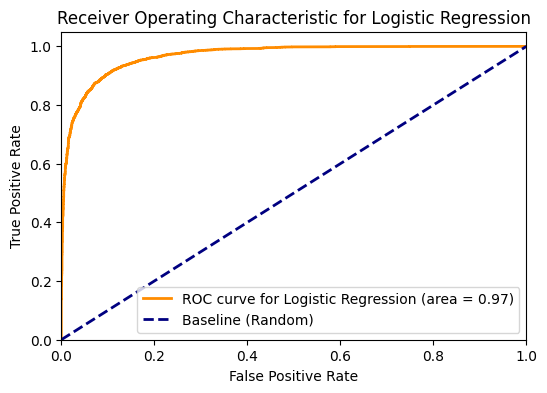

ROC curve cannot be plotted for Ridge Classifier: Model does not support predict_proba.
ROC curve cannot be plotted for SGD Classifier: Model does not support predict_proba.


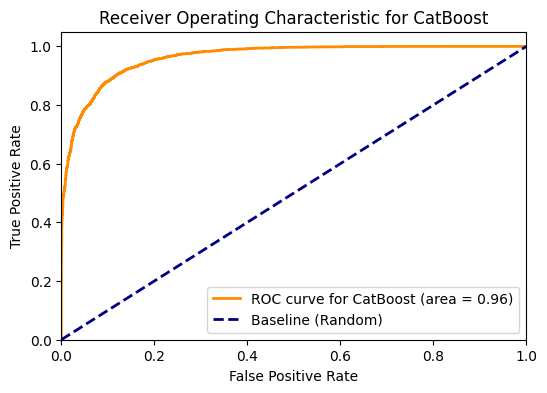

[LightGBM] [Info] Number of positive: 16145, number of negative: 16200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.378077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17485
[LightGBM] [Info] Number of data points in the train set: 32345, number of used features: 4282
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499150 -> initscore=-0.003401
[LightGBM] [Info] Start training from score -0.003401


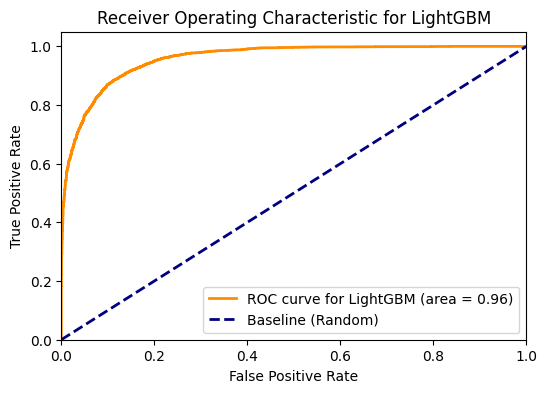

In [ ]:
#Plot ROC Curves

# Loop over models, train, predict and evaluate
for model_name, model_info in models.items():
    try:
        model = model_info["model"]
        model.fit(X_train['text_'], y_train)
        predictions = model.predict(X_test['text_'])

        # Compute ROC curve and ROC area if the model supports it
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test['text_'])[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_score)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve if available
            plt.figure(figsize=(6, 4))
            lw = 2
            plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve for {model_name} (area = %0.2f)' % roc_auc)
            plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Baseline (Random)')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'Receiver Operating Characteristic for {model_name}')
            plt.legend(loc="lower right")
            plt.show()

        else:
            print(f"ROC curve cannot be plotted for {model_name}: Model does not support predict_proba.")

    except Exception as e:
        print(f"Error occurred for model {model_name}: {e}")

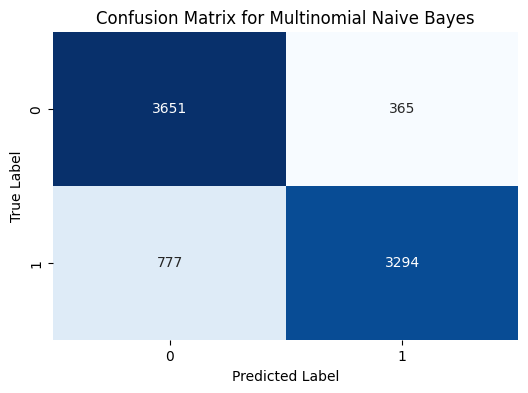

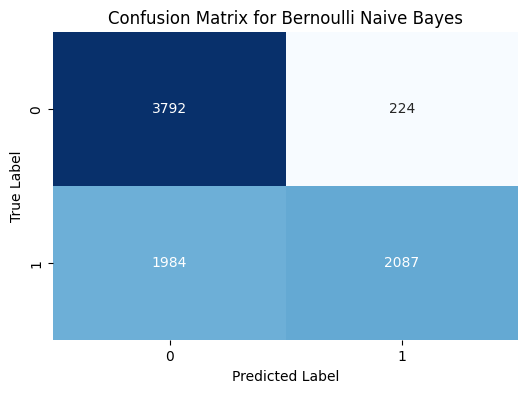

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


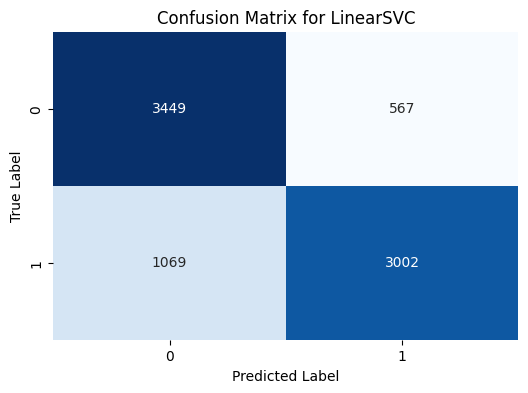

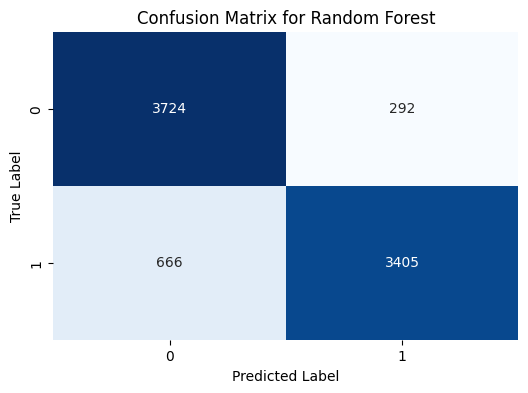

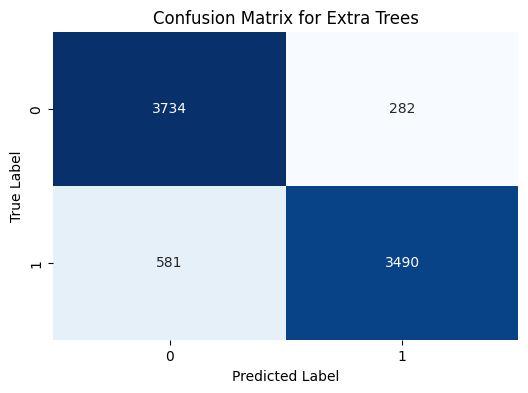

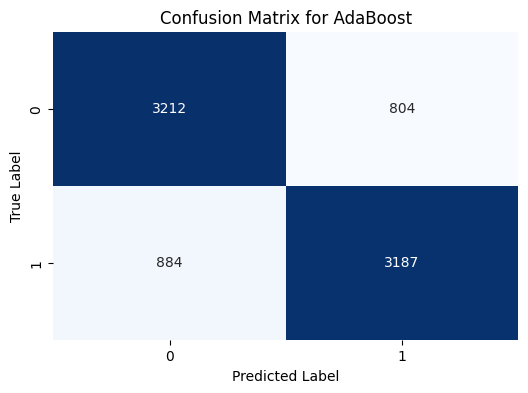

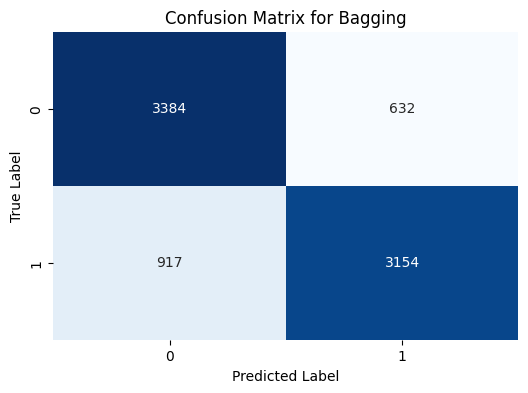

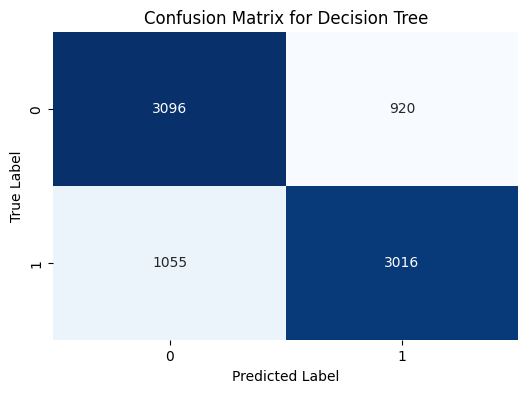

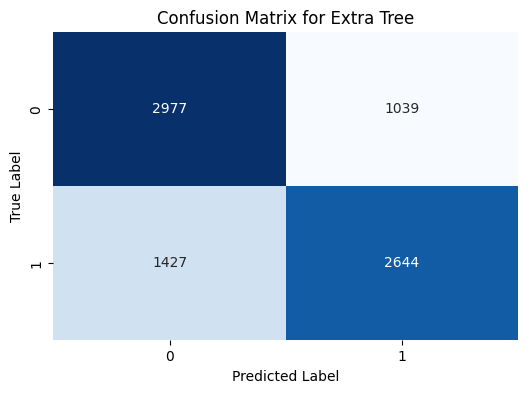

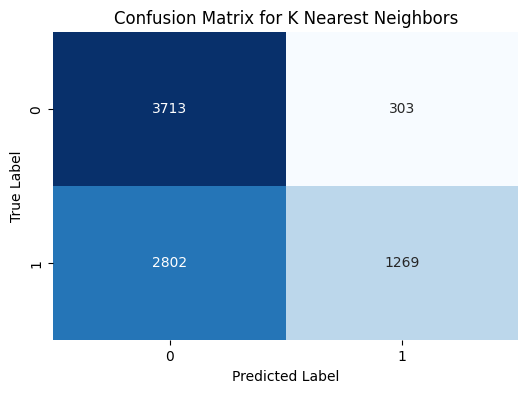

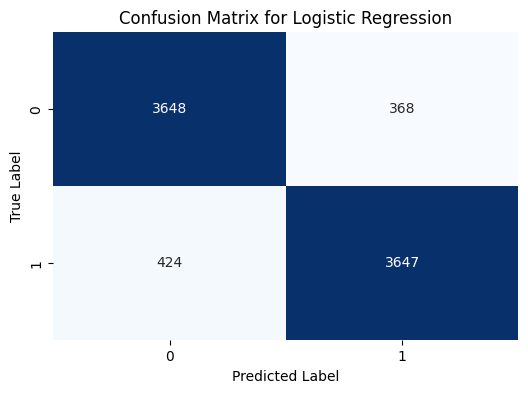

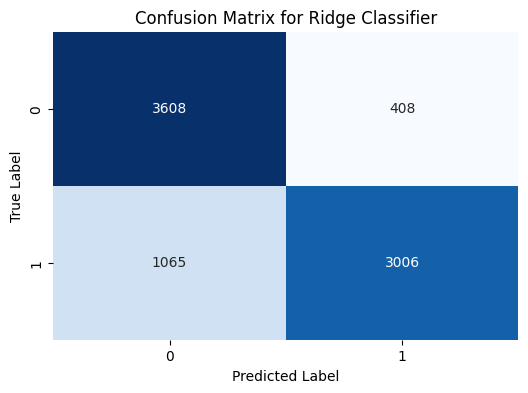

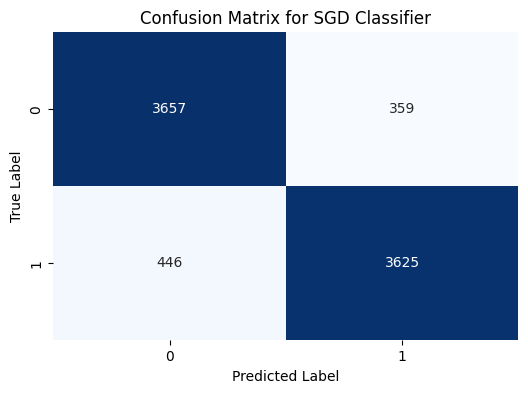

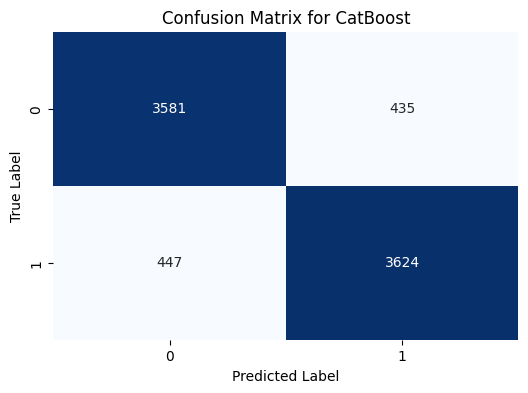

[LightGBM] [Info] Number of positive: 16145, number of negative: 16200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.629769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17485
[LightGBM] [Info] Number of data points in the train set: 32345, number of used features: 4282
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499150 -> initscore=-0.003401
[LightGBM] [Info] Start training from score -0.003401


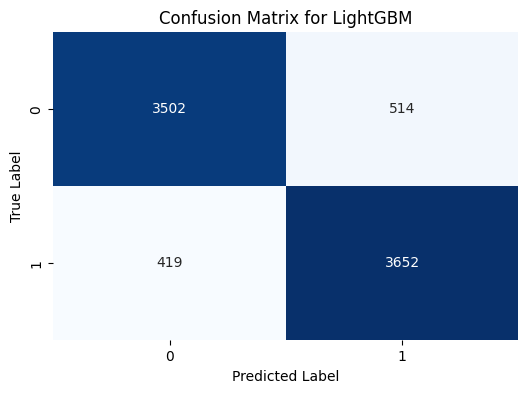

In [ ]:
#Plot confusion matrices

# Loop over models, train, predict and evaluate
for model_name, model_info in models.items():
    try:
        model = model_info["model"]
        model.fit(X_train['text_'], y_train)
        predictions = model.predict(X_test['text_'])

        # Compute confusion matrix
        cm = confusion_matrix(y_test, predictions)

        # Plot confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

    except Exception as e:
        print(f"Error occurred for model {model_name}: {e}")

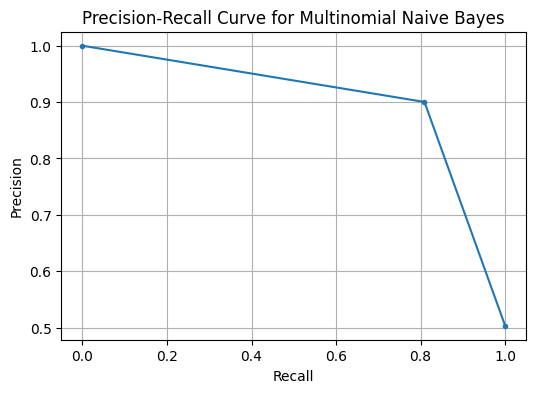

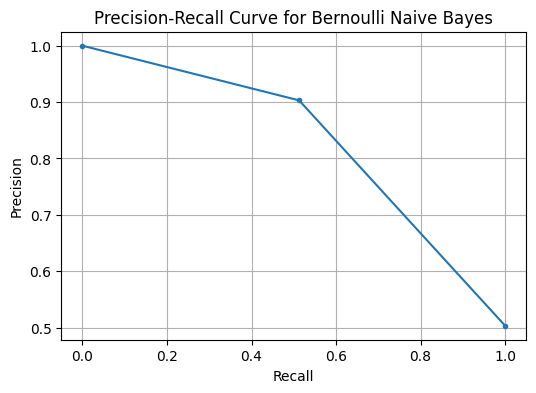

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


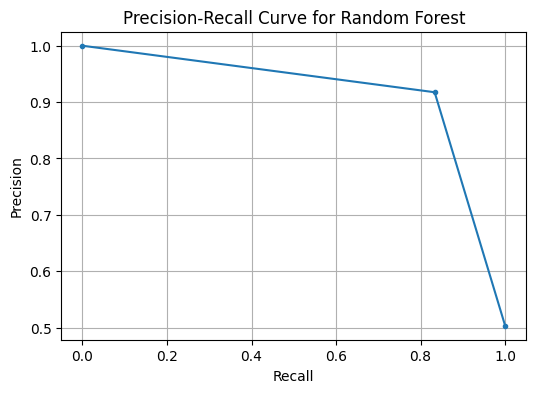

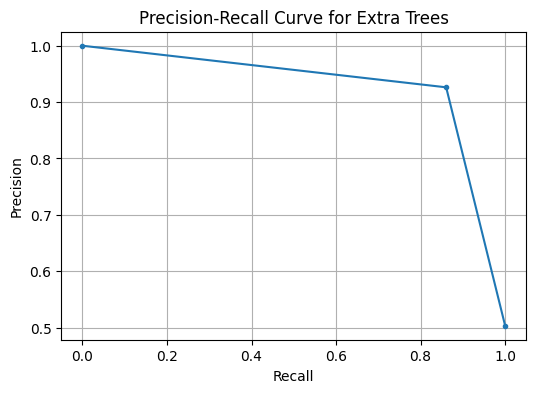

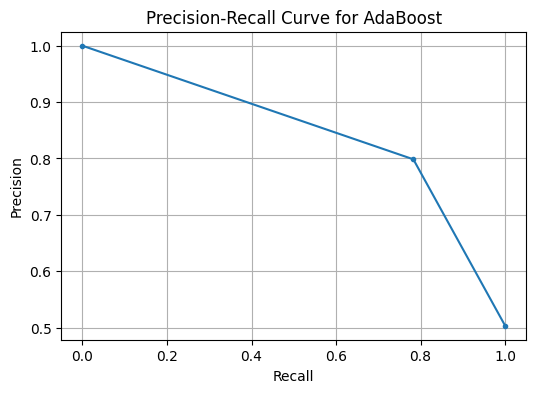

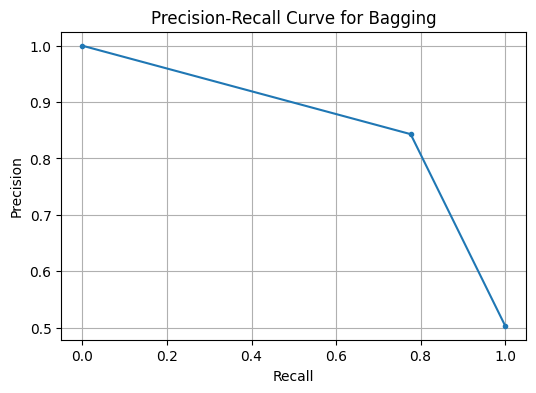

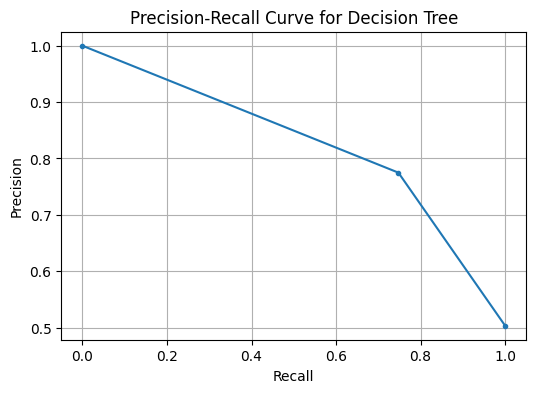

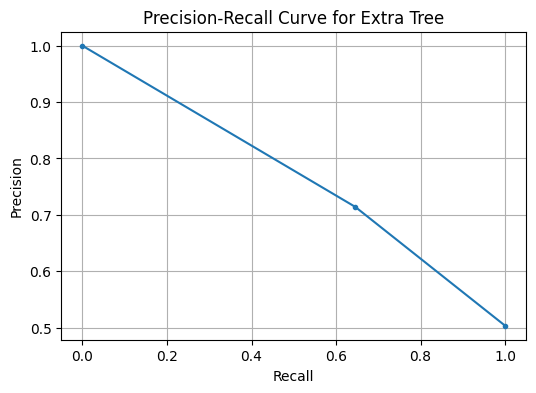

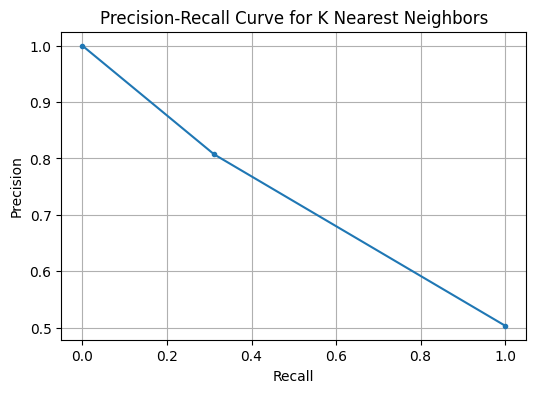

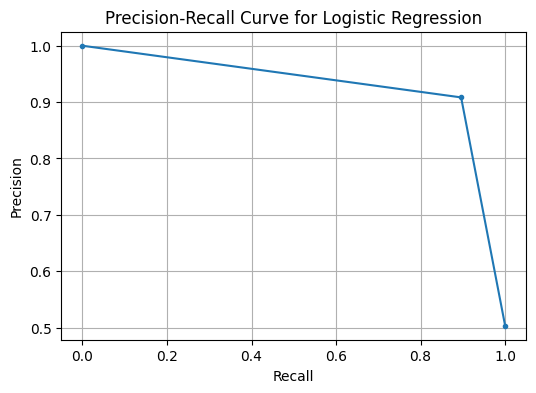

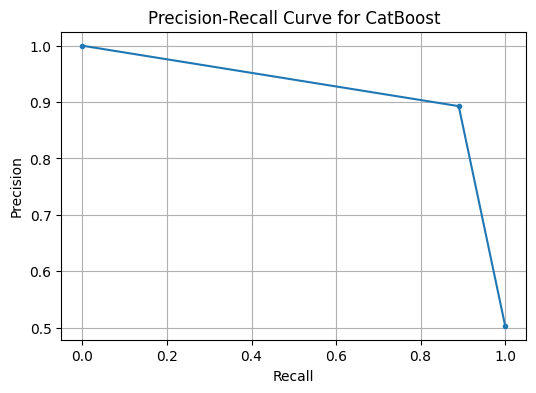

[LightGBM] [Info] Number of positive: 16145, number of negative: 16200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.531727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17485
[LightGBM] [Info] Number of data points in the train set: 32345, number of used features: 4282
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499150 -> initscore=-0.003401
[LightGBM] [Info] Start training from score -0.003401


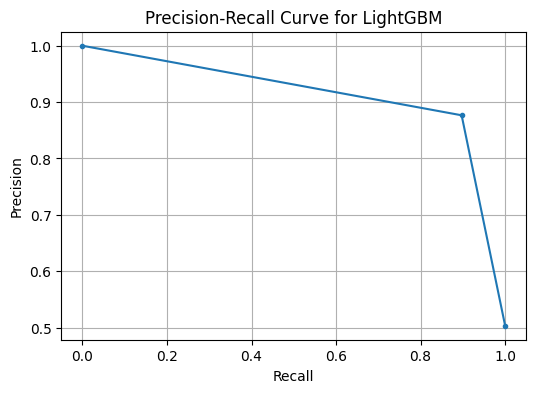

In [ ]:
# Plot Precision Recall curves

from sklearn.metrics import precision_recall_curve

# Iterate over models
for model_name, model_info in models.items():
    try:
        model = model_info["model"]
        model.fit(X_train['text_'], y_train)
        predictions = model.predict(X_test['text_'])
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='weighted')
        recall = recall_score(y_test, predictions, average='weighted')
        f1 = f1_score(y_test, predictions, average='weighted')

        # Check if model supports predict_proba for precision-recall curve
        if hasattr(model, "predict_proba"):
            # Compute precision-recall curve
            precision_curve, recall_curve, _ = precision_recall_curve(y_test, predictions)

            # Plot precision-recall curve
            plt.figure(figsize=(6, 4))
            plt.plot(recall_curve, precision_curve, marker='.')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(f'Precision-Recall Curve for {model_name}')
            plt.grid(True)
            plt.show()

    except Exception as e:
        print(f"Error occurred for model {model_name}: {e}")


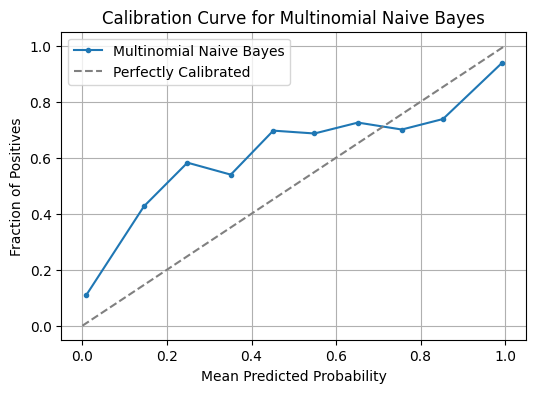

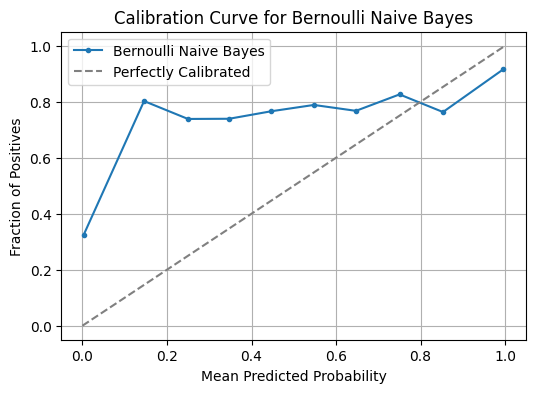

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


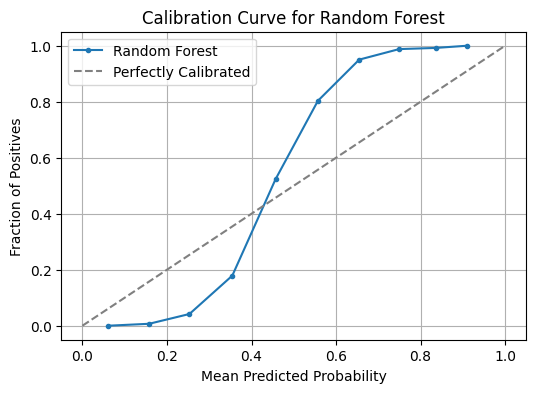

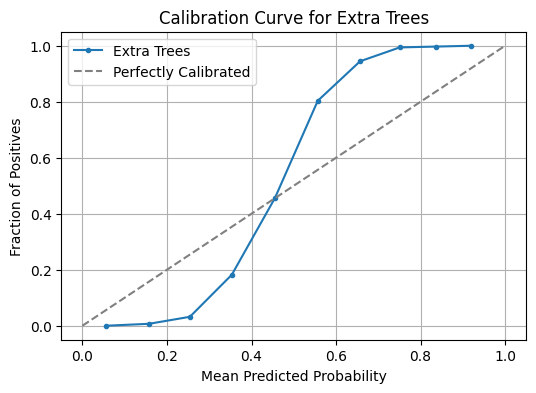

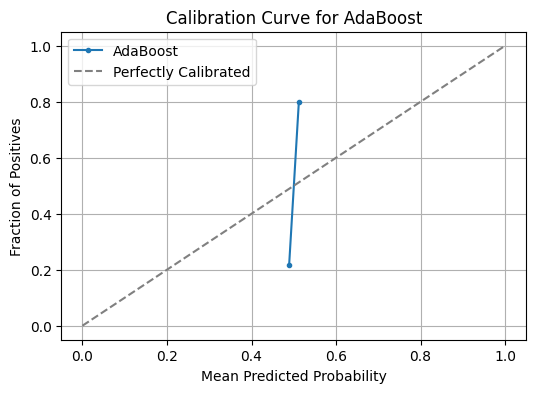

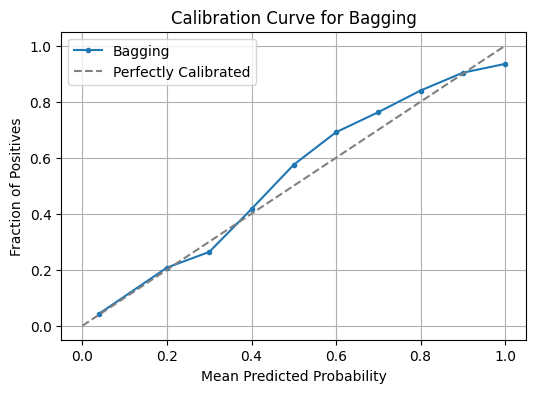

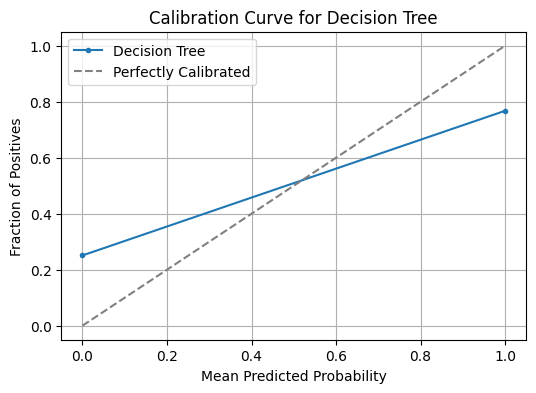

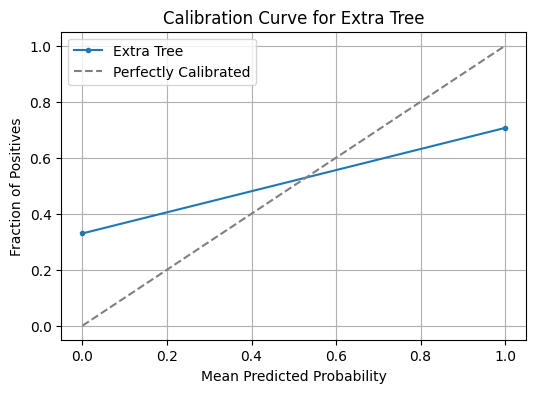

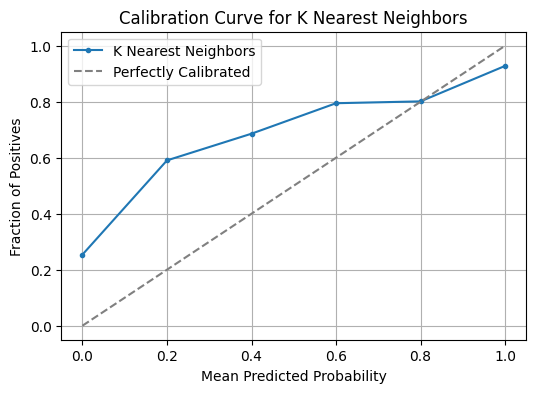

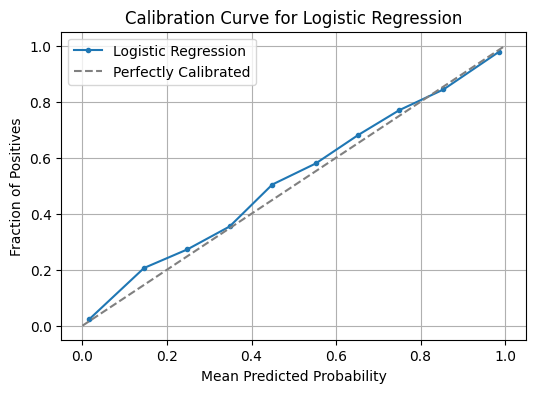

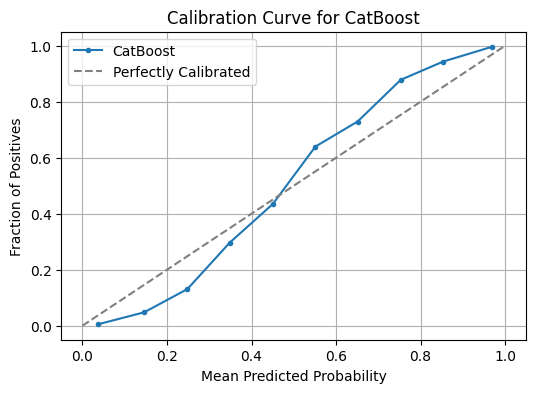

[LightGBM] [Info] Number of positive: 16145, number of negative: 16200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.513016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17485
[LightGBM] [Info] Number of data points in the train set: 32345, number of used features: 4282
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499150 -> initscore=-0.003401
[LightGBM] [Info] Start training from score -0.003401


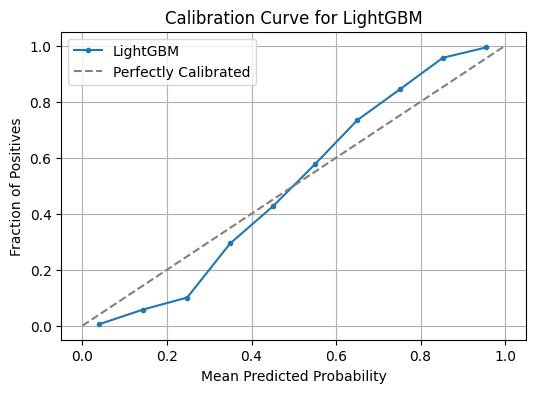

In [ ]:
#Plot calibration curves

from sklearn.calibration import calibration_curve

# Iterate over models
for model_name, model_info in models.items():
    try:
        model = model_info["model"]
        model.fit(X_train['text_'], y_train)
        predictions = model.predict(X_test['text_'])
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='weighted')
        recall = recall_score(y_test, predictions, average='weighted')
        f1 = f1_score(y_test, predictions, average='weighted')

        # Check if model supports predict_proba for calibration curve
        if hasattr(model, "predict_proba"):
            # Compute calibration curve
            prob_true, prob_pred = calibration_curve(y_test, model.predict_proba(X_test['text_'])[:, 1], n_bins=10)

            # Plot calibration curve
            plt.figure(figsize=(6, 4))
            plt.plot(prob_pred, prob_true, marker='.', label=model_name)
            plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
            plt.xlabel('Mean Predicted Probability')
            plt.ylabel('Fraction of Positives')
            plt.title(f'Calibration Curve for {model_name}')
            plt.legend(loc='best')
            plt.grid(True)
            plt.show()

    except Exception as e:
        print(f"Error occurred for model {model_name}: {e}")


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_file_path = '/content/drive/MyDrive/fake reviews dataset.csv'
fake_reviews_df = pd.read_csv(data_file_path)

Visualizing the dataset is an essential step in understanding its characteristics. Here's an overview of the visualizations conducted:

1. **Correlation Matrix**: A heatmap was created to visualize the correlation between numerical features like 'rating' and 'text_length'. This helps in understanding the relationships between different variables.

2. **Distribution of Labels**: The distribution of the target variable 'label' was visualized using a countplot. This provides insights into the balance or imbalance of classes in the dataset.

3. **Distribution of Ratings**: Another countplot was used to visualize the distribution of ratings, providing an overview of the distribution of ratings among the reviews.

4. **Distribution of Categories**: A countplot was employed to visualize the distribution of categories, shedding light on the distribution of reviews across different categories.

5. **Distribution of Text Length**: The distribution of text length was visualized using a histogram, offering insights into the length distribution of the reviews.

6. **Word Cloud for Reviews**: A word cloud was generated to visualize the most common words in the reviews, providing a visual summary of the textual data.

7. **Distribution of Sentiment Scores**: Sentiment analysis using NLTK was conducted, and the distribution of sentiment scores (specifically compound sentiment scores) was visualized using a histogram, offering insights into the overall sentiment polarity of the reviews.

These visualizations offer valuable insights into various aspects of the dataset, aiding in exploratory data analysis and informing subsequent modeling tasks.


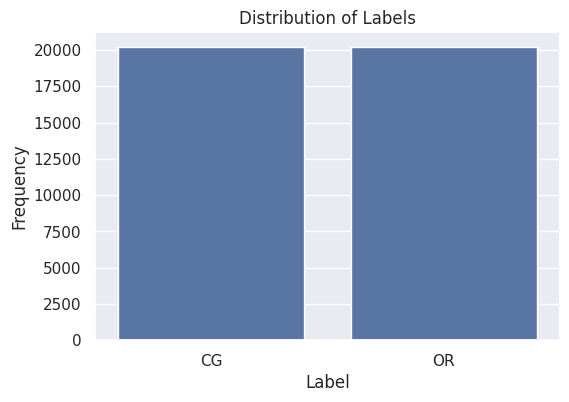

In [ ]:
# Visualize distribution of target variable ('label')
sns.set(rc={'figure.figsize':(6, 4)})  # Adjust figure size
sns.countplot(x='label', data=fake_reviews_df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

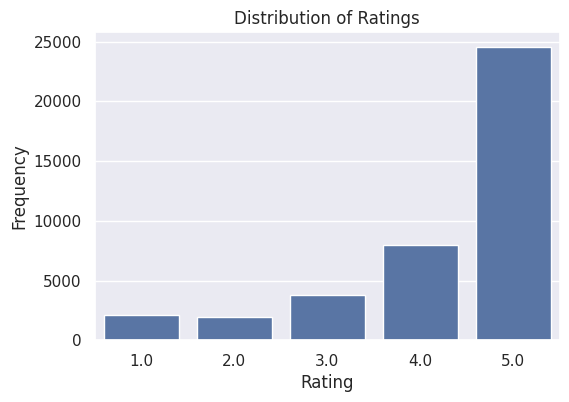

In [ ]:
# Visualize distribution of ratings
sns.countplot(x='rating', data=fake_reviews_df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

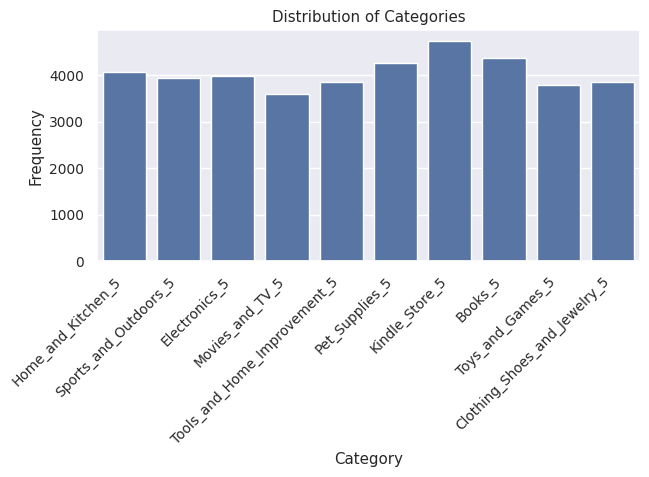

In [ ]:
# Visualize distribution of categories
plt.figure(figsize=(7, 3))
sns.set(font_scale=0.9)  # Set font scale
sns.countplot(x='category', data=fake_reviews_df)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

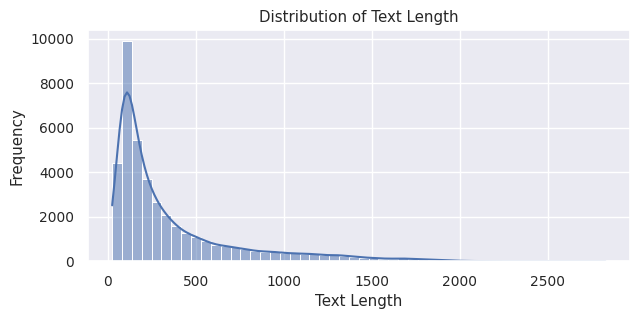

In [ ]:
# Visualize the distribution of text length
fake_reviews_df['text_length'] = fake_reviews_df['text_'].apply(len)
plt.figure(figsize=(7, 3))
sns.set(font_scale=0.9)  # Set font scale
sns.histplot(fake_reviews_df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Download NLTK VADER lexicon
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

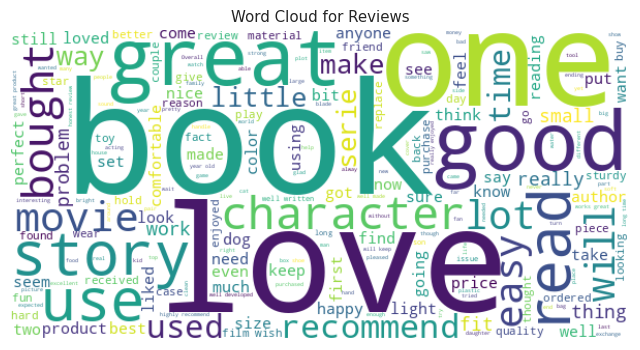

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

# Visualize word cloud for the entire corpus
text_corpus = ' '.join(fake_reviews_df['text_'])
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(text_corpus)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

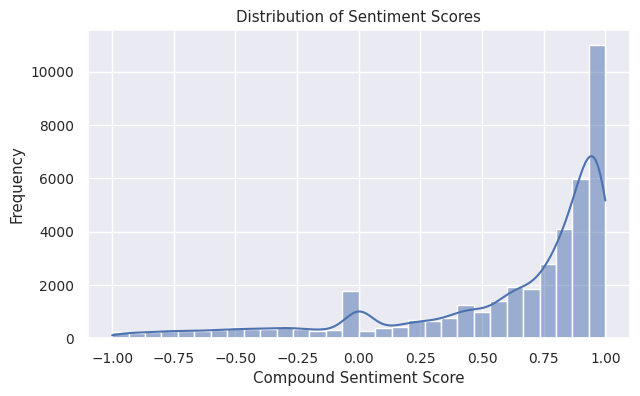

In [ ]:
# Sentiment analysis using NLTK
sia = SentimentIntensityAnalyzer()
fake_reviews_df['compound'] = fake_reviews_df['text_'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize sentiment distribution
plt.figure(figsize=(7, 4))
sns.histplot(fake_reviews_df['compound'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

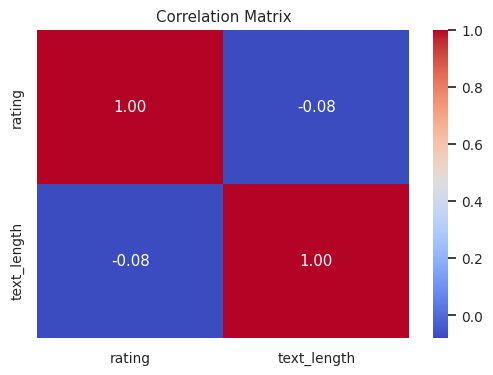

In [ ]:
# Visualize the correlation between numerical features
numerical_features = ['rating', 'text_length']
correlation_matrix = fake_reviews_df[numerical_features].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
